<a href="https://colab.research.google.com/github/rajenbala/dlaicourse/blob/master/Functional_MultiInput.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

print(tf.__version__)

2.4.1


In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [13]:
# Get the data from UCI dataset
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Use pandas excel reader
df = pd.read_excel(URL)
df = df.sample(frac=1).reset_index(drop=True) # Return random sample based on frac parameter. If it is 0.5 return 50% of data as sample.

In [29]:
train, test = train_test_split(df, test_size=0.2)
train_stats = train.describe()

In [30]:
train_stats.pop('Y1')
train_stats.pop('Y2')
train_stats = train_stats.transpose()

In [31]:
def format_output(data):
    y1 = data.pop('Y1')
    y1 = np.array(y1)
    y2 = data.pop('Y2')
    y2 = np.array(y2)
    return y1, y2


def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [32]:
train_Y=format_output(train)
test_Y=format_output(test)

In [34]:
# Normalize the training and test data
norm_train_X = norm(train)
norm_test_X = norm(test)

In [35]:
train.shape

(614, 8)

In [39]:
input=tf.keras.Input(shape=(len(train.columns),))

dense1=tf.keras.layers.Dense(20,activation="relu")(input)
dense2=tf.keras.layers.Dense(20,activation="relu")(dense1)

output1=tf.keras.layers.Dense(1,name="output_shape1")(dense2)

dense3=tf.keras.layers.Dense(20)(dense2)

output2=tf.keras.layers.Dense(1,name="output_shape2")(dense3)

model=tf.keras.Model(inputs=input,outputs=[output1,output2])


In [40]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 20)           180         input_2[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 20)           420         dense_5[0][0]                    
__________________________________________________________________________________________________
dense_7 (Dense)                 (None, 20)           420         dense_6[0][0]                    
____________________________________________________________________________________________

In [46]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001),
              loss={'output_shape1':'mse','output_shape1':'mse'},
              metrics={'output_shape1': tf.keras.metrics.Accuracy(),'output_shape2':tf.keras.metrics.RootMeanSquaredError()})



In [47]:
# Train the model for 500 epochs
history = model.fit(norm_train_X, train_Y,
                    epochs=500, batch_size=10, validation_data=(norm_test_X, test_Y))

Epoch 1/500
62/62 [==============================] - 1s 6ms/step - loss: 1.9478 - output_shape1_loss: 1.9478 - output_shape1_accuracy: 0.0000e+00 - output_shape2_root_mean_squared_error: 26.8645 - val_loss: 2.9891 - val_output_shape1_loss: 2.9891 - val_output_shape1_accuracy: 0.0000e+00 - val_output_shape2_root_mean_squared_error: 26.3292
Epoch 2/500
62/62 [==============================] - 0s 2ms/step - loss: 1.8337 - output_shape1_loss: 1.8337 - output_shape1_accuracy: 0.0000e+00 - output_shape2_root_mean_squared_error: 26.5469 - val_loss: 2.2109 - val_output_shape1_loss: 2.2109 - val_output_shape1_accuracy: 0.0000e+00 - val_output_shape2_root_mean_squared_error: 26.3199
Epoch 3/500
62/62 [==============================] - 0s 2ms/step - loss: 1.9356 - output_shape1_loss: 1.9356 - output_shape1_accuracy: 0.0000e+00 - output_shape2_root_mean_squared_error: 27.5667 - val_loss: 1.9410 - val_output_shape1_loss: 1.9410 - val_output_shape1_accuracy: 0.0000e+00 - val_output_shape2_root_mean_

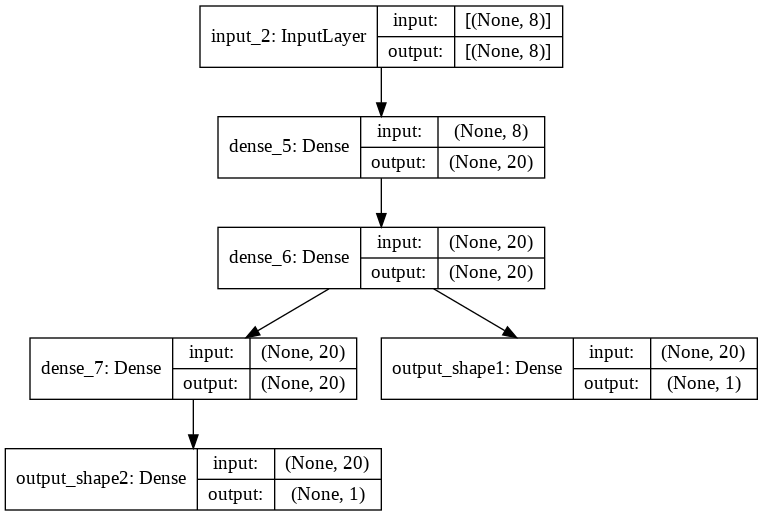

In [50]:
from tensorflow.python.keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True)

In [56]:
# Test the model and print loss and mse for both outputs
loss, Y1_loss, Y1_Accuracy,Y2_rmse = model.evaluate(x=norm_test_X, y=test_Y)
print("Loss = {}, Y1_loss = {}, Y1_Accuracy = {}, Y2_mse = {}".format(loss, Y1_loss,Y1_Accuracy, Y2_rmse))

5/5 [==============================] - 0s 3ms/step - loss: 0.2646 - output_shape1_loss: 0.2646 - output_shape1_accuracy: 0.0000e+00 - output_shape2_root_mean_squared_error: 26.1051
Loss = 0.26461073756217957, Y1_loss = 0.26461073756217957, Y1_Accuracy = 0.0, Y2_mse = 26.10505485534668


In [57]:
def plot_diff(y_true, y_pred, title=''):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel('True Values')
    plt.ylabel('Predictions')
    plt.axis('equal')
    plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    plt.plot([-100, 100], [-100, 100])
    plt.show()


def plot_metrics(metric_name, title, ylim=5):
    plt.title(title)
    plt.ylim(0, ylim)
    plt.plot(history.history[metric_name], color='blue', label=metric_name)
    plt.plot(history.history['val_' + metric_name], color='green', label='val_' + metric_name)
    plt.show()

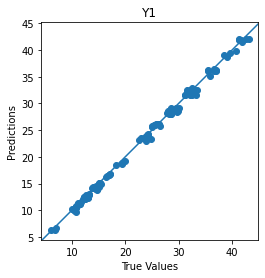

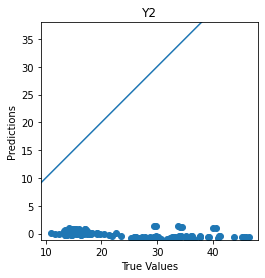

KeyError: ignored

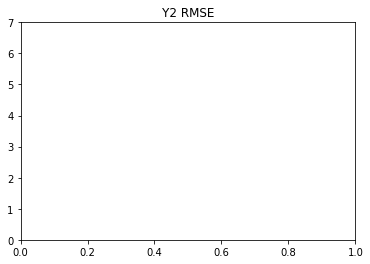

In [61]:
# Plot the loss and mse
Y_pred = model.predict(norm_test_X)
plot_diff(test_Y[0], Y_pred[0], title='Y1')
plot_diff(test_Y[1], Y_pred[1], title='Y2')
#plot_metrics(metric_name='y1_output_root_mean_squared_error', title='', ylim=6)
plot_metrics(metric_name='y2_output_root_mean_squared_error', title='Y2 RMSE', ylim=7)